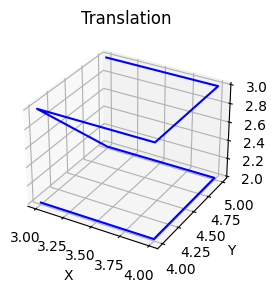

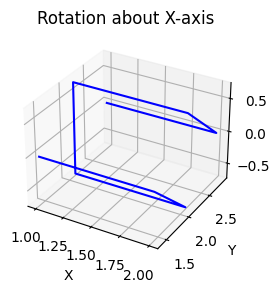

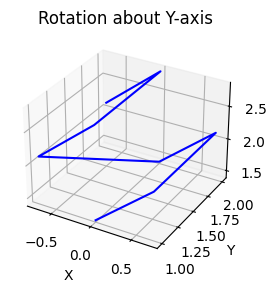

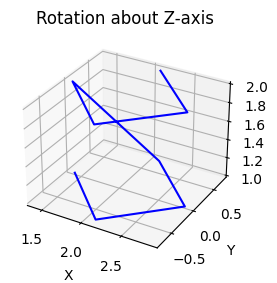

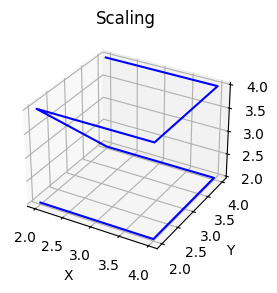

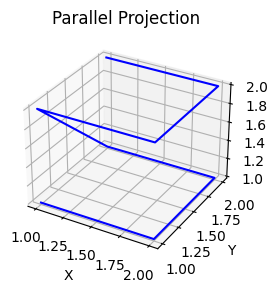

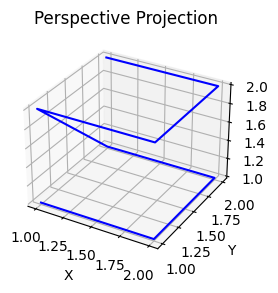

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Transformation3D:
    def __init__(self, points):
        self.points = np.array(points)

    def translate(self, tx, ty, tz):
        translation_matrix = np.array([[1, 0, 0, tx],
                                       [0, 1, 0, ty],
                                       [0, 0, 1, tz],
                                       [0, 0, 0, 1]])
        transformed_points = np.dot(translation_matrix, np.vstack([self.points.T, np.ones(len(self.points))]))
        return transformed_points[:-1].T

    def rotate_x(self, angle):
        rotation_matrix = np.array([[1, 0, 0],
                                     [0, np.cos(angle), -np.sin(angle)],
                                     [0, np.sin(angle), np.cos(angle)]])
        return np.dot(self.points, rotation_matrix)

    def rotate_y(self, angle):
        rotation_matrix = np.array([[np.cos(angle), 0, np.sin(angle)],
                                     [0, 1, 0],
                                     [-np.sin(angle), 0, np.cos(angle)]])
        return np.dot(self.points, rotation_matrix)

    def rotate_z(self, angle):
        rotation_matrix = np.array([[np.cos(angle), -np.sin(angle), 0],
                                     [np.sin(angle), np.cos(angle), 0],
                                     [0, 0, 1]])
        return np.dot(self.points, rotation_matrix)

    def scale(self, sx, sy, sz):
        scaling_matrix = np.array([[sx, 0, 0],
                                    [0, sy, 0],
                                    [0, 0, sz]])
        return np.dot(self.points, scaling_matrix)

    def plot_3d(self, points, title):
        fig = plt.figure(figsize=(3,3))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot(points[:, 0], points[:, 1], points[:, 2], 'b-')
        ax.set_title(title)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        plt.show()

    def parallel_projection(self, points):
        return points

    def perspective_projection(self, points, d):
        return points

# Define initial 3D points
points_3d = np.array([[1, 1, 1],
                      [2, 1, 1],
                      [2, 2, 1],
                      [1, 2, 1],
                      [1, 1, 2],
                      [2, 1, 2],
                      [2, 2, 2],
                      [1, 2, 2]])

transformer_3d = Transformation3D(points_3d)

# Translation
translated_points_3d = transformer_3d.translate(2, 3, 1)
transformer_3d.plot_3d(translated_points_3d, 'Translation')

# Rotation
rotated_points_x = transformer_3d.rotate_x(np.pi/4)
transformer_3d.plot_3d(rotated_points_x, 'Rotation about X-axis')

rotated_points_y = transformer_3d.rotate_y(np.pi/4)
transformer_3d.plot_3d(rotated_points_y, 'Rotation about Y-axis')

rotated_points_z = transformer_3d.rotate_z(np.pi/4)
transformer_3d.plot_3d(rotated_points_z, 'Rotation about Z-axis')

# Scaling
scaled_points_3d = transformer_3d.scale(2, 2, 2)
transformer_3d.plot_3d(scaled_points_3d, 'Scaling')

# Parallel projection
parallel_projection_points = transformer_3d.parallel_projection(points_3d)
transformer_3d.plot_3d(parallel_projection_points, 'Parallel Projection')

# Perspective projection
perspective_projection_points = transformer_3d.perspective_projection(points_3d, 10)
transformer_3d.plot_3d(perspective_projection_points, 'Perspective Projection')
